In [1]:
from fastai  import  *
from fastai.vision import *

In [2]:
path='/content/drive/MyDrive/Custome_data'

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
data=ImageDataBunch.from_folder(path,train='.', valid_pct=0.3, ds_tfms=get_transforms(),bs=4,size=224)

In [98]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (33 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Laraib,Laraib,Laraib,Laraib,Laraib
Path: /content/drive/MyDrive/Custome_data;

Valid: LabelList (14 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Laraib,Hammad,Hammad,mubashir,mubashir
Path: /content/drive/MyDrive/Custome_data;

Test: None

In [99]:

learn=cnn_learner(data, models.resnet18 ,metrics=[accuracy,error_rate])

In [100]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [106]:
learn.fit_one_cycle(11)

In [107]:
interp = ClassificationInterpretation.from_learner(learn)

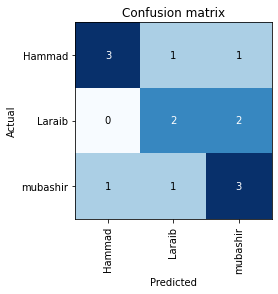

In [108]:
interp.plot_confusion_matrix()

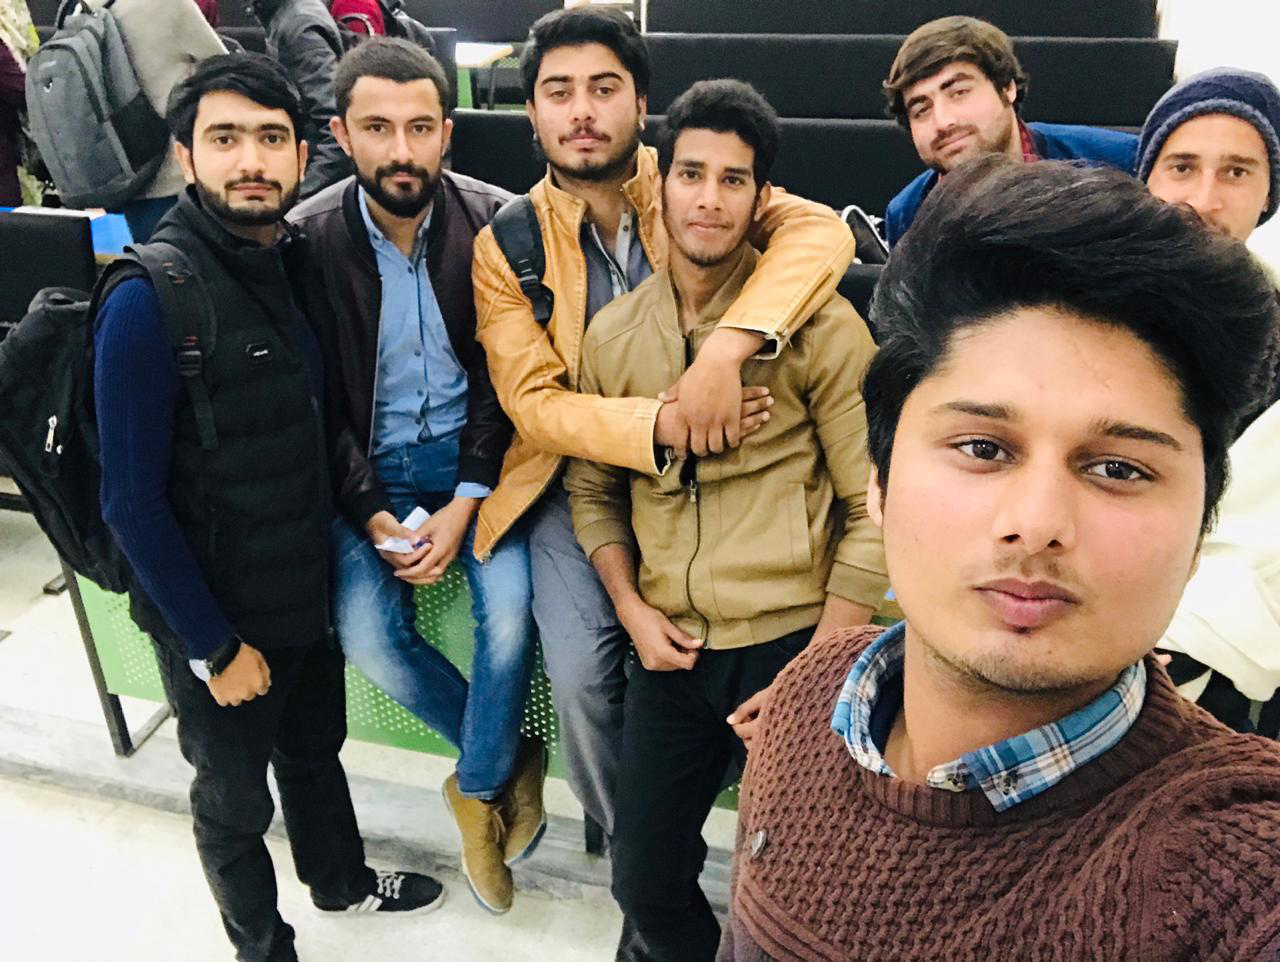

In [113]:
i=open_image('/content/drive/MyDrive/Custome_data/Laraib/WhatsApp Image 2021-10-05 at 10.07.02 AM.jpeg')
i

In [114]:
what,_,probs =learn.predict(i)
print(f"It's a {what}!")
print(f"Probability it's a {what}: {probs[1].item():.6f}")

It's a Laraib!
Probability it's a Laraib: 0.999498


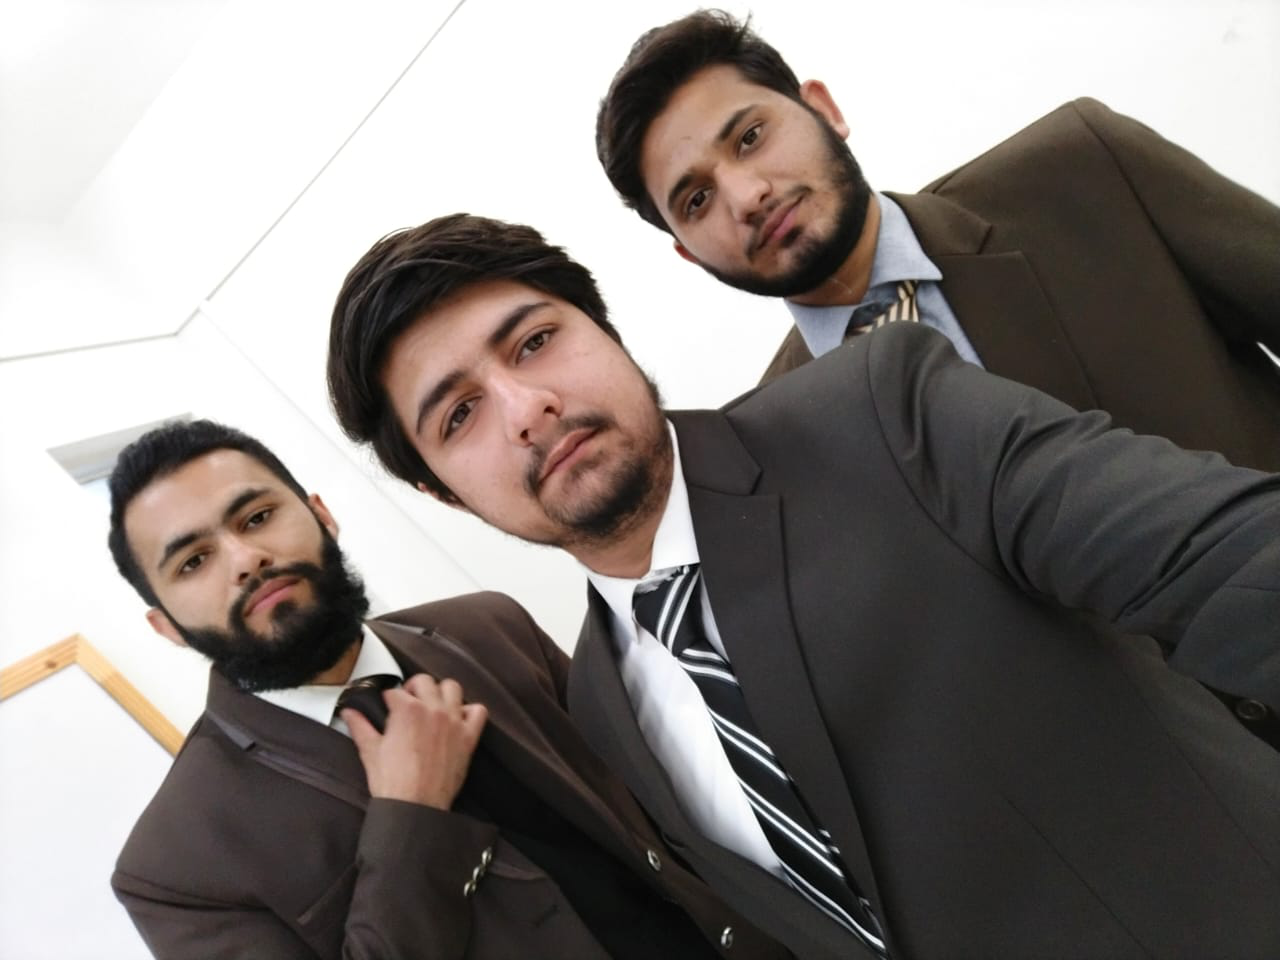

In [123]:
i=open_image('/content/drive/MyDrive/Custome_data/Hammad/WhatsApp Image 2021-10-06 at 10.50.35 AM (2).jpeg')
i

In [124]:
what,_,probs =learn.predict(i)
print(f"It's a {what}!")
print(f"Probability it's a {what}: {probs[1].item():.6f}")

It's a Hammad!
Probability it's a Hammad: 0.000192


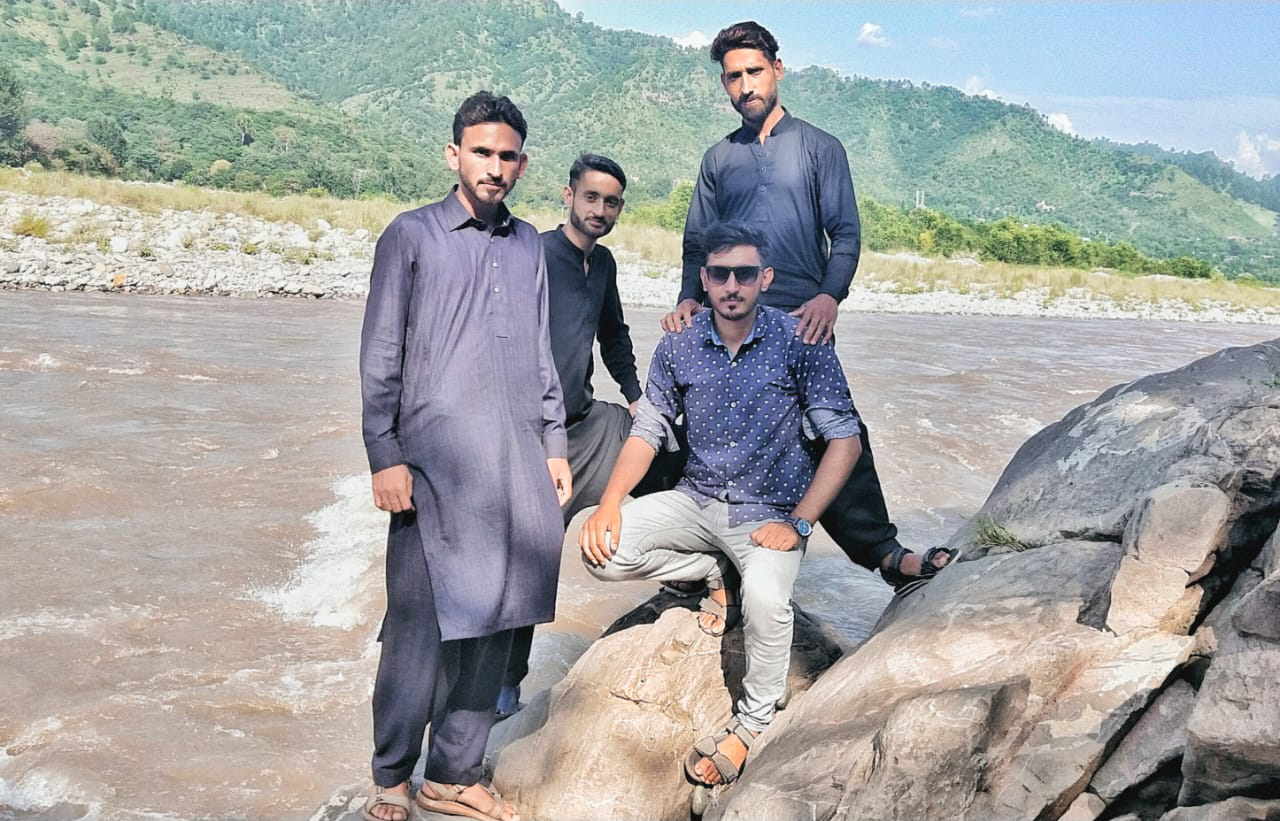

In [121]:
i=open_image('/content/drive/MyDrive/Custome_data/mubashir/WhatsApp Image 2021-10-05 at 10.07.24 AM.jpeg')
i

In [122]:
what,_,probs =learn.predict(i)
print(f"It's a {what}!")
print(f"Probability it's a {what}: {probs[1].item():.6f}")

It's a mubashir!
Probability it's a mubashir: 0.001112
